In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df_origin = df.copy(deep=True)

In [4]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
df=df.drop('country', axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df_sc=sc.fit_transform(df)
dff_sc=pd.DataFrame(df_sc, columns=df.columns)
dff_sc

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


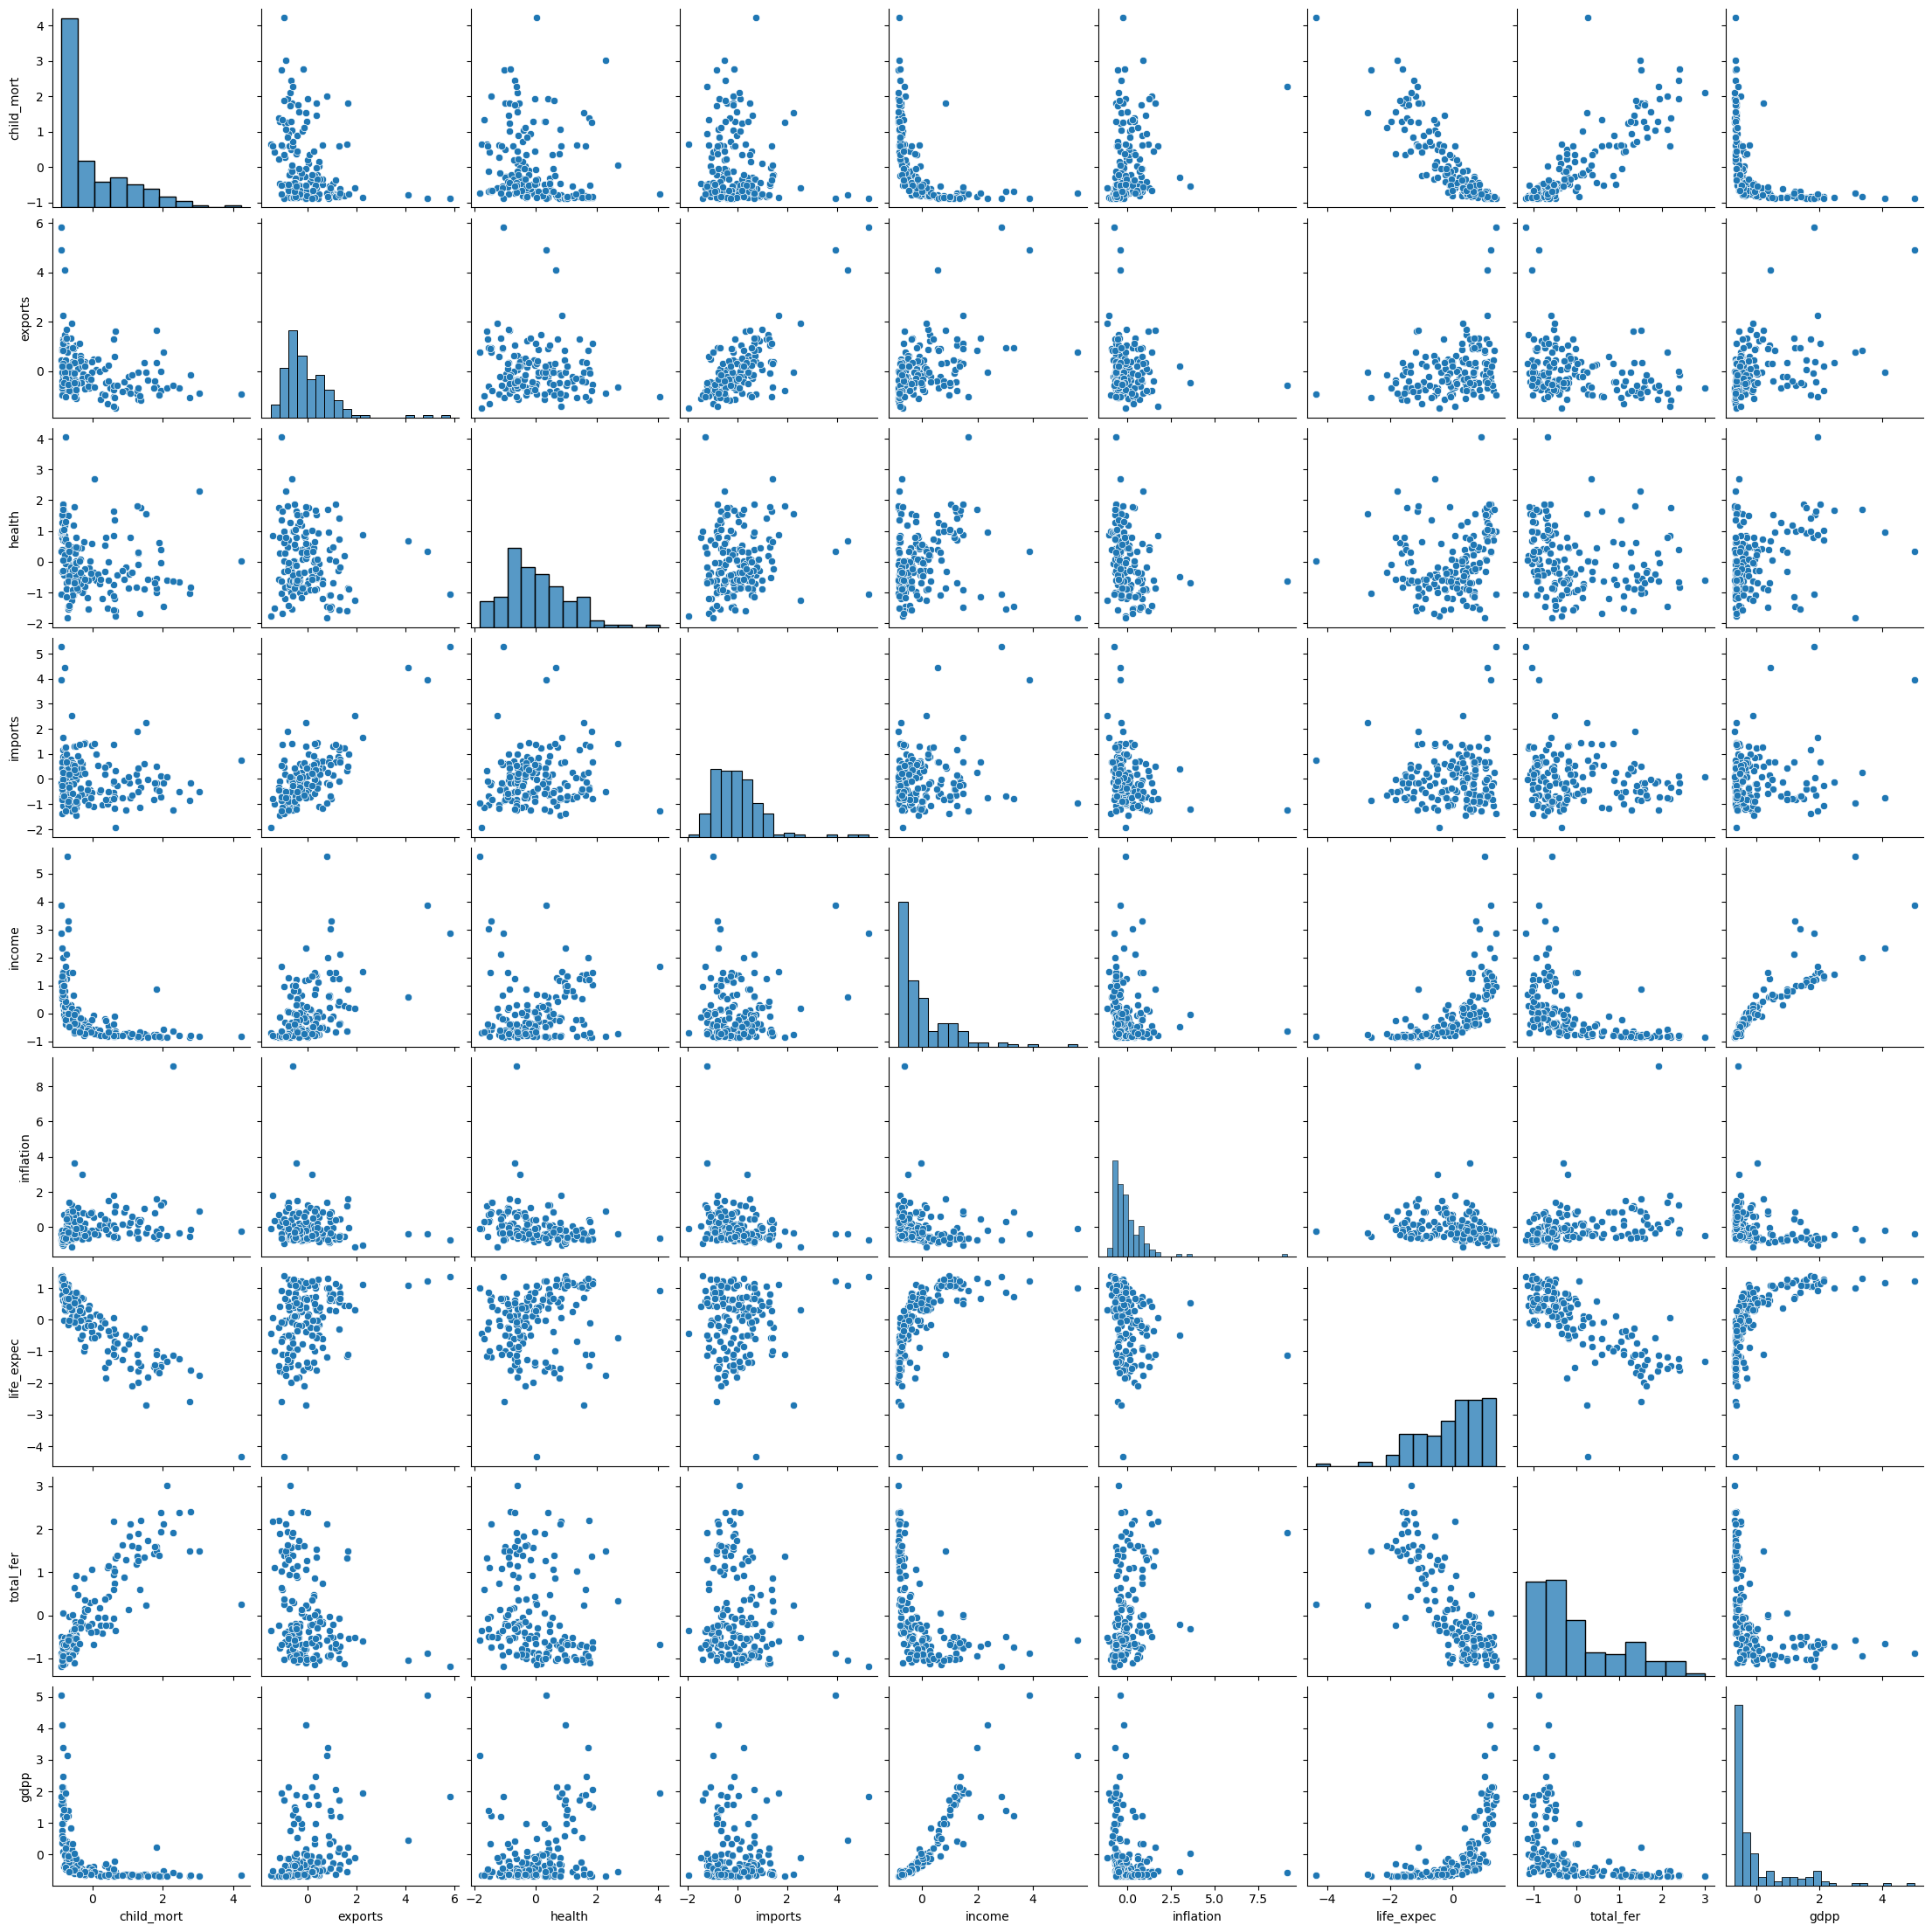

In [7]:
sns.pairplot(dff_sc)

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
sil_score=[]
sil_cluster_map = {}
K = 15
for i in range(2,K):
    model_km = KMeans(n_clusters=i, init="k-means++")
    pred = model_km.fit_predict(df_sc)
    wcss.append(model_km.inertia_)

    sil = silhouette_score(df_sc,pred, metric = 'euclidean')
    sil_score.append(sil)

    sil_cluster_map[sil] = i 


print(wcss)
print(sil_score)
print(sil_cluster_map)

print(max(sil_score))
sil_cluster_map.get(max(sil_score))

[1050.2145582853304, 831.4244352086874, 700.703325849751, 631.3877859960571, 551.3018692517416, 511.5788901105749, 461.9924525348856, 424.7714189866099, 397.3778992940503, 374.9700881999997, 352.8952380532764, 339.3078624070806, 322.6727485473099]
[0.28735668921406704, 0.28329575683463126, 0.303676957667828, 0.22327899566511256, 0.23300198114343365, 0.2228174395897622, 0.23037339728836723, 0.23007553373792283, 0.20982363786170488, 0.2040011656761732, 0.20108869160859935, 0.19848159606072607, 0.2024279794681872]
{0.28735668921406704: 2, 0.28329575683463126: 3, 0.303676957667828: 4, 0.22327899566511256: 5, 0.23300198114343365: 6, 0.2228174395897622: 7, 0.23037339728836723: 8, 0.23007553373792283: 9, 0.20982363786170488: 10, 0.2040011656761732: 11, 0.20108869160859935: 12, 0.19848159606072607: 13, 0.2024279794681872: 14}
0.303676957667828


4

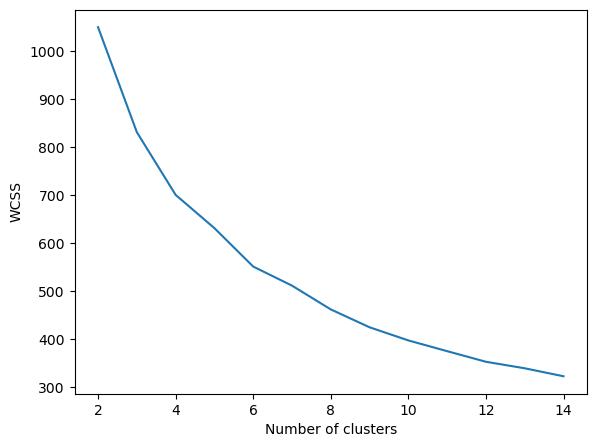

In [9]:
fig=plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(range(2,K),wcss)
axes.set_xlabel('Number of clusters')
axes.set_ylabel('WCSS')
plt.show()


In [10]:
# Optimal number of clusters as per Sil score is 4

model_km=KMeans(n_clusters=4, init='k-means++')
ypred=model_km.fit_predict(df_sc)

In [11]:
df_origin['cluster_id'] = ypred
df_origin.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


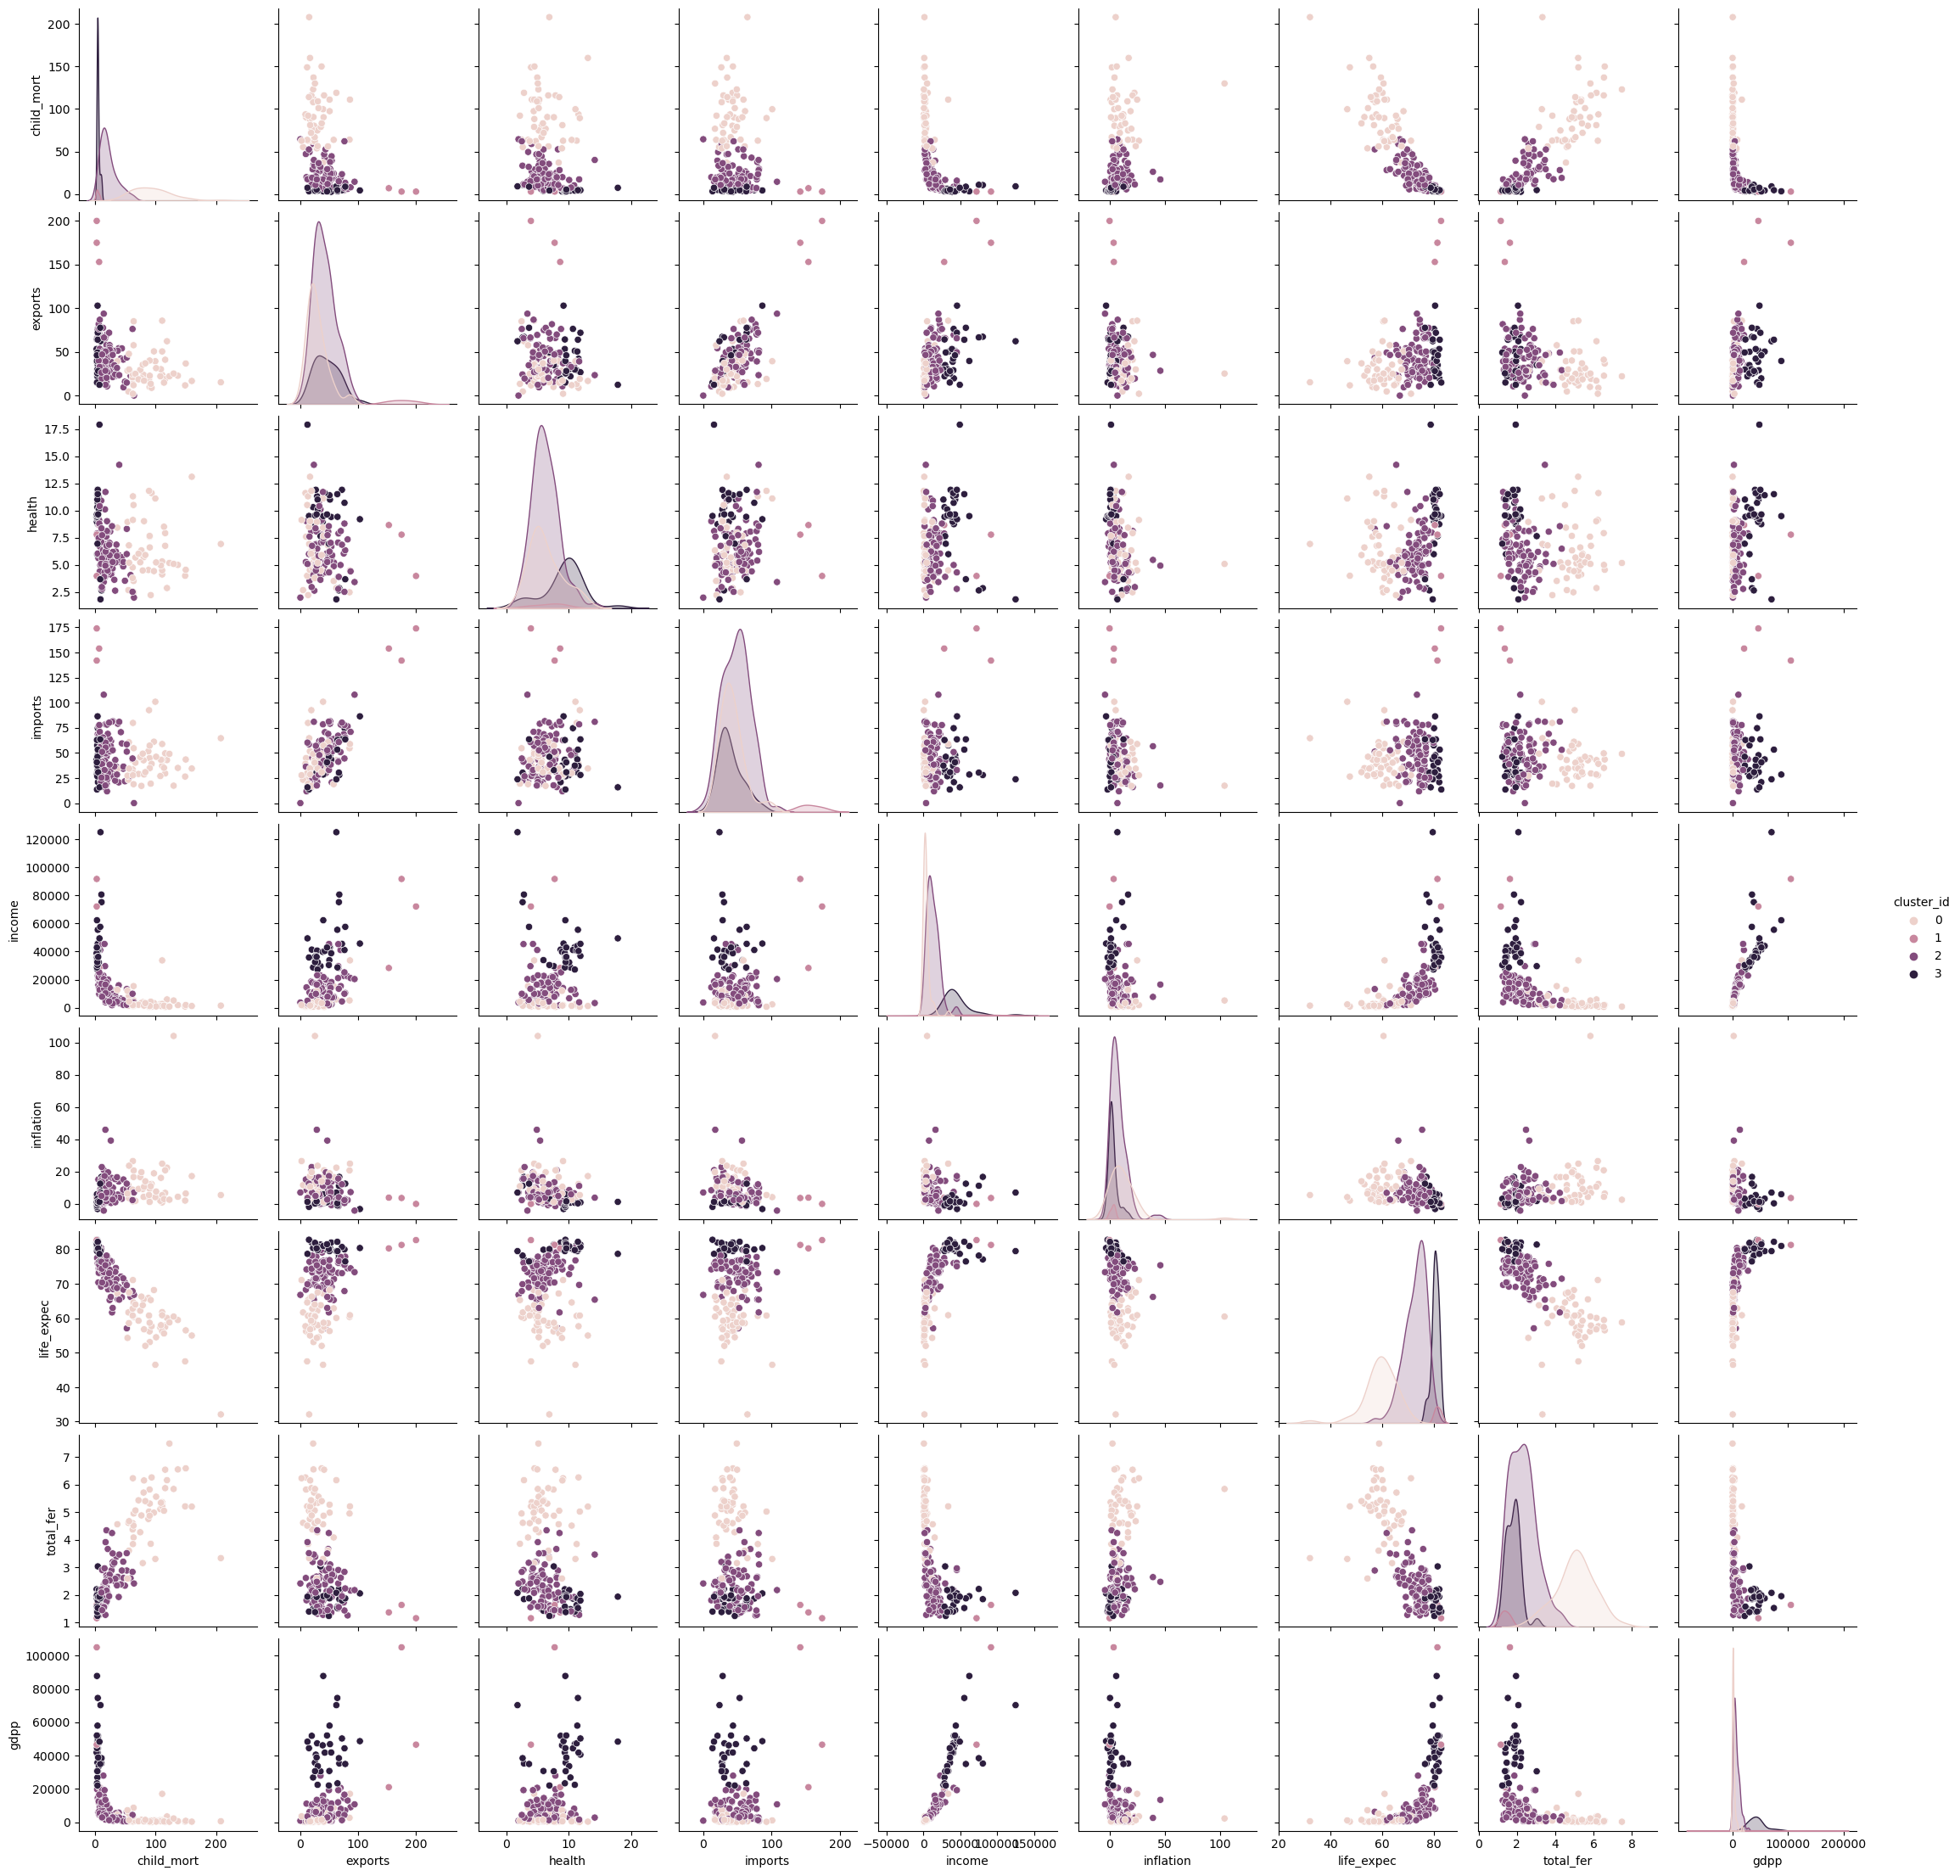

In [12]:
sns.pairplot(data=df_origin.iloc[:,1:], hue='cluster_id')
plt.show()

In [31]:
# sns.boxplot(data=df_origin.loc[((df_origin.country=='Canada') | (df_origin.country=='Australia')),],x='country', y='gdpp', hue = 'cluster_id')
# plt.show()